# Лабараторная работа №6
## Линейная регрессия в Sklearn
**Выполнил:** 6131-010402D, Музыка Артем

### 0. Найти и загрузить датасет, подходящий для задачи регрессии.
Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from pandas import get_dummies

warnings.filterwarnings("ignore")

In [157]:
df = pd.read_csv('data\deaths.csv')

1.   AnalysisDate                                                                                       `object`
2.  Date Of Death Year                                                                                  `int64` 
3.   Date Of Death Month                                                                                `int64` 
4.   Start Date                                                                                         `object`
5.   End Date                                                                                           `object`
6.   Jurisdiction of Occurrence                                                                         `object`
7.   Sex                                                                                                `object`
8.   Race/Ethnicity                                                                                     `object`
9.   AgeGroup                                                                                           `object`
10.  AllCause                                                                                           `int64 `
11.  NaturalCause                                                                                       `int64 `
12.  Septicemia (A40-A41)                                                                               `int64 `
13.  Malignant neoplasms (C00-C97)                                                                      `int64 `
14.  Diabetes mellitus (E10-E14)                                                                        `int64 `
15.  Alzheimer disease (G30)                                                                            `int64 `
16.  Influenza and pneumonia (J09-J18)                                                                  `int64 `
17.  Chronic lower respiratory diseases (J40-J47)                                                       `int64 `
18.  Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)                                 `int64 `
19.  Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)                              `int64 `
20.  Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)  `int64 `
21.  Diseases of heart (I00-I09,I11,I13,I20-I51)                                                        `int64 `
22.  Cerebrovascular diseases (I60-I69)                                                                 `int64 `
23.  COVID-19 (U071, Multiple Cause of Death)                                                           `int64 `
24.  COVID-19 (U071, Underlying Cause of Death)                                                         `int64 `

In [26]:
df.head(5)

,AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,0-4 years,182,...,0,4,0,1,0,22,1,0,0,0
1,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,5-14 years,44,...,0,4,1,0,0,0,0,0,0,0
2,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,15-24 years,122,...,0,0,2,1,2,4,6,1,0,0
3,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,25-34 years,198,...,0,5,2,3,0,2,8,2,0,0
4,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,35-44 years,334,...,0,11,6,4,4,5,25,10,0,0


### Обработка датасета

In [158]:
L_del = ['AnalysisDate', 'Start Date', 'End Date']
try:
    for i in L_del:
        df.pop(i)
except:
    pass

In [159]:
def sex_replce(S):
    if S == 'Female':
        S = S.replace('emale','')
    if S == "Male":
        S = S.replace('ale','')
    return S

In [160]:
df['Sex'] = df['Sex'].apply(sex_replce)

In [30]:
L_object = ['Jurisdiction of Occurrence','Sex','Race/Ethnicity','AgeGroup']
for i in L_object:
    code, unique = pd.factorize(df[i])
    df[i] = code

### 1. Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [161]:
full_copy = df.copy()

In [32]:
for_delete = ['Jurisdiction of Occurrence', 'Race/Ethnicity', 'AgeGroup']

In [33]:
for f in for_delete:
    df.pop(f)

### 2. Визуализировать heatmap-матрицу кореллированности признаков

<AxesSubplot:>

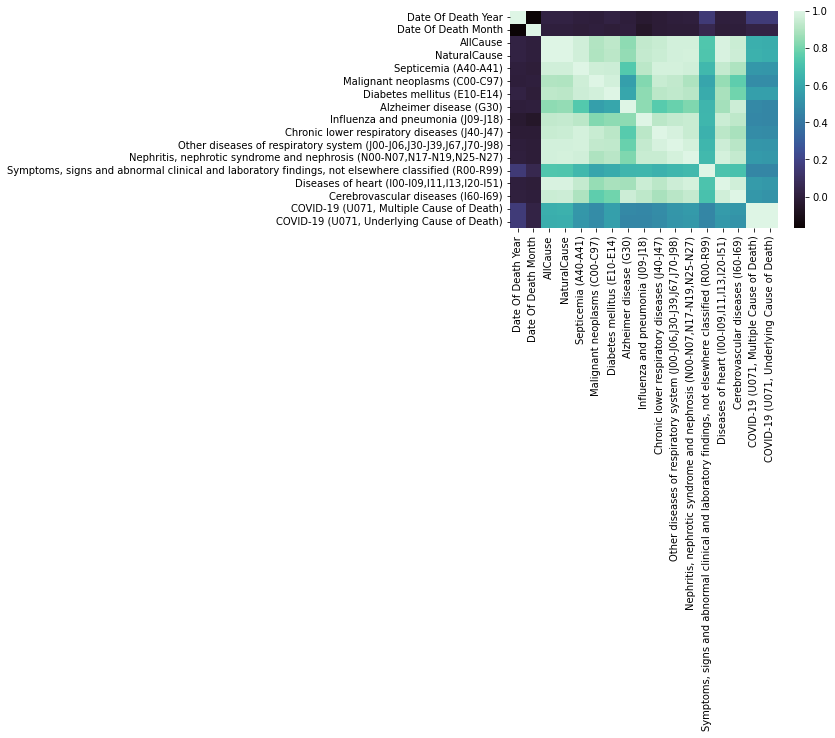

In [21]:
sns.heatmap(df.corr(), cmap="mako")

### 3. Визуализировать взаимосвязь между целевой переменной и каждым признаком (с помощью `srs.pairplot` или `pandas.plotting`.`scatter_matrix` или как-то ещё). 
Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной.


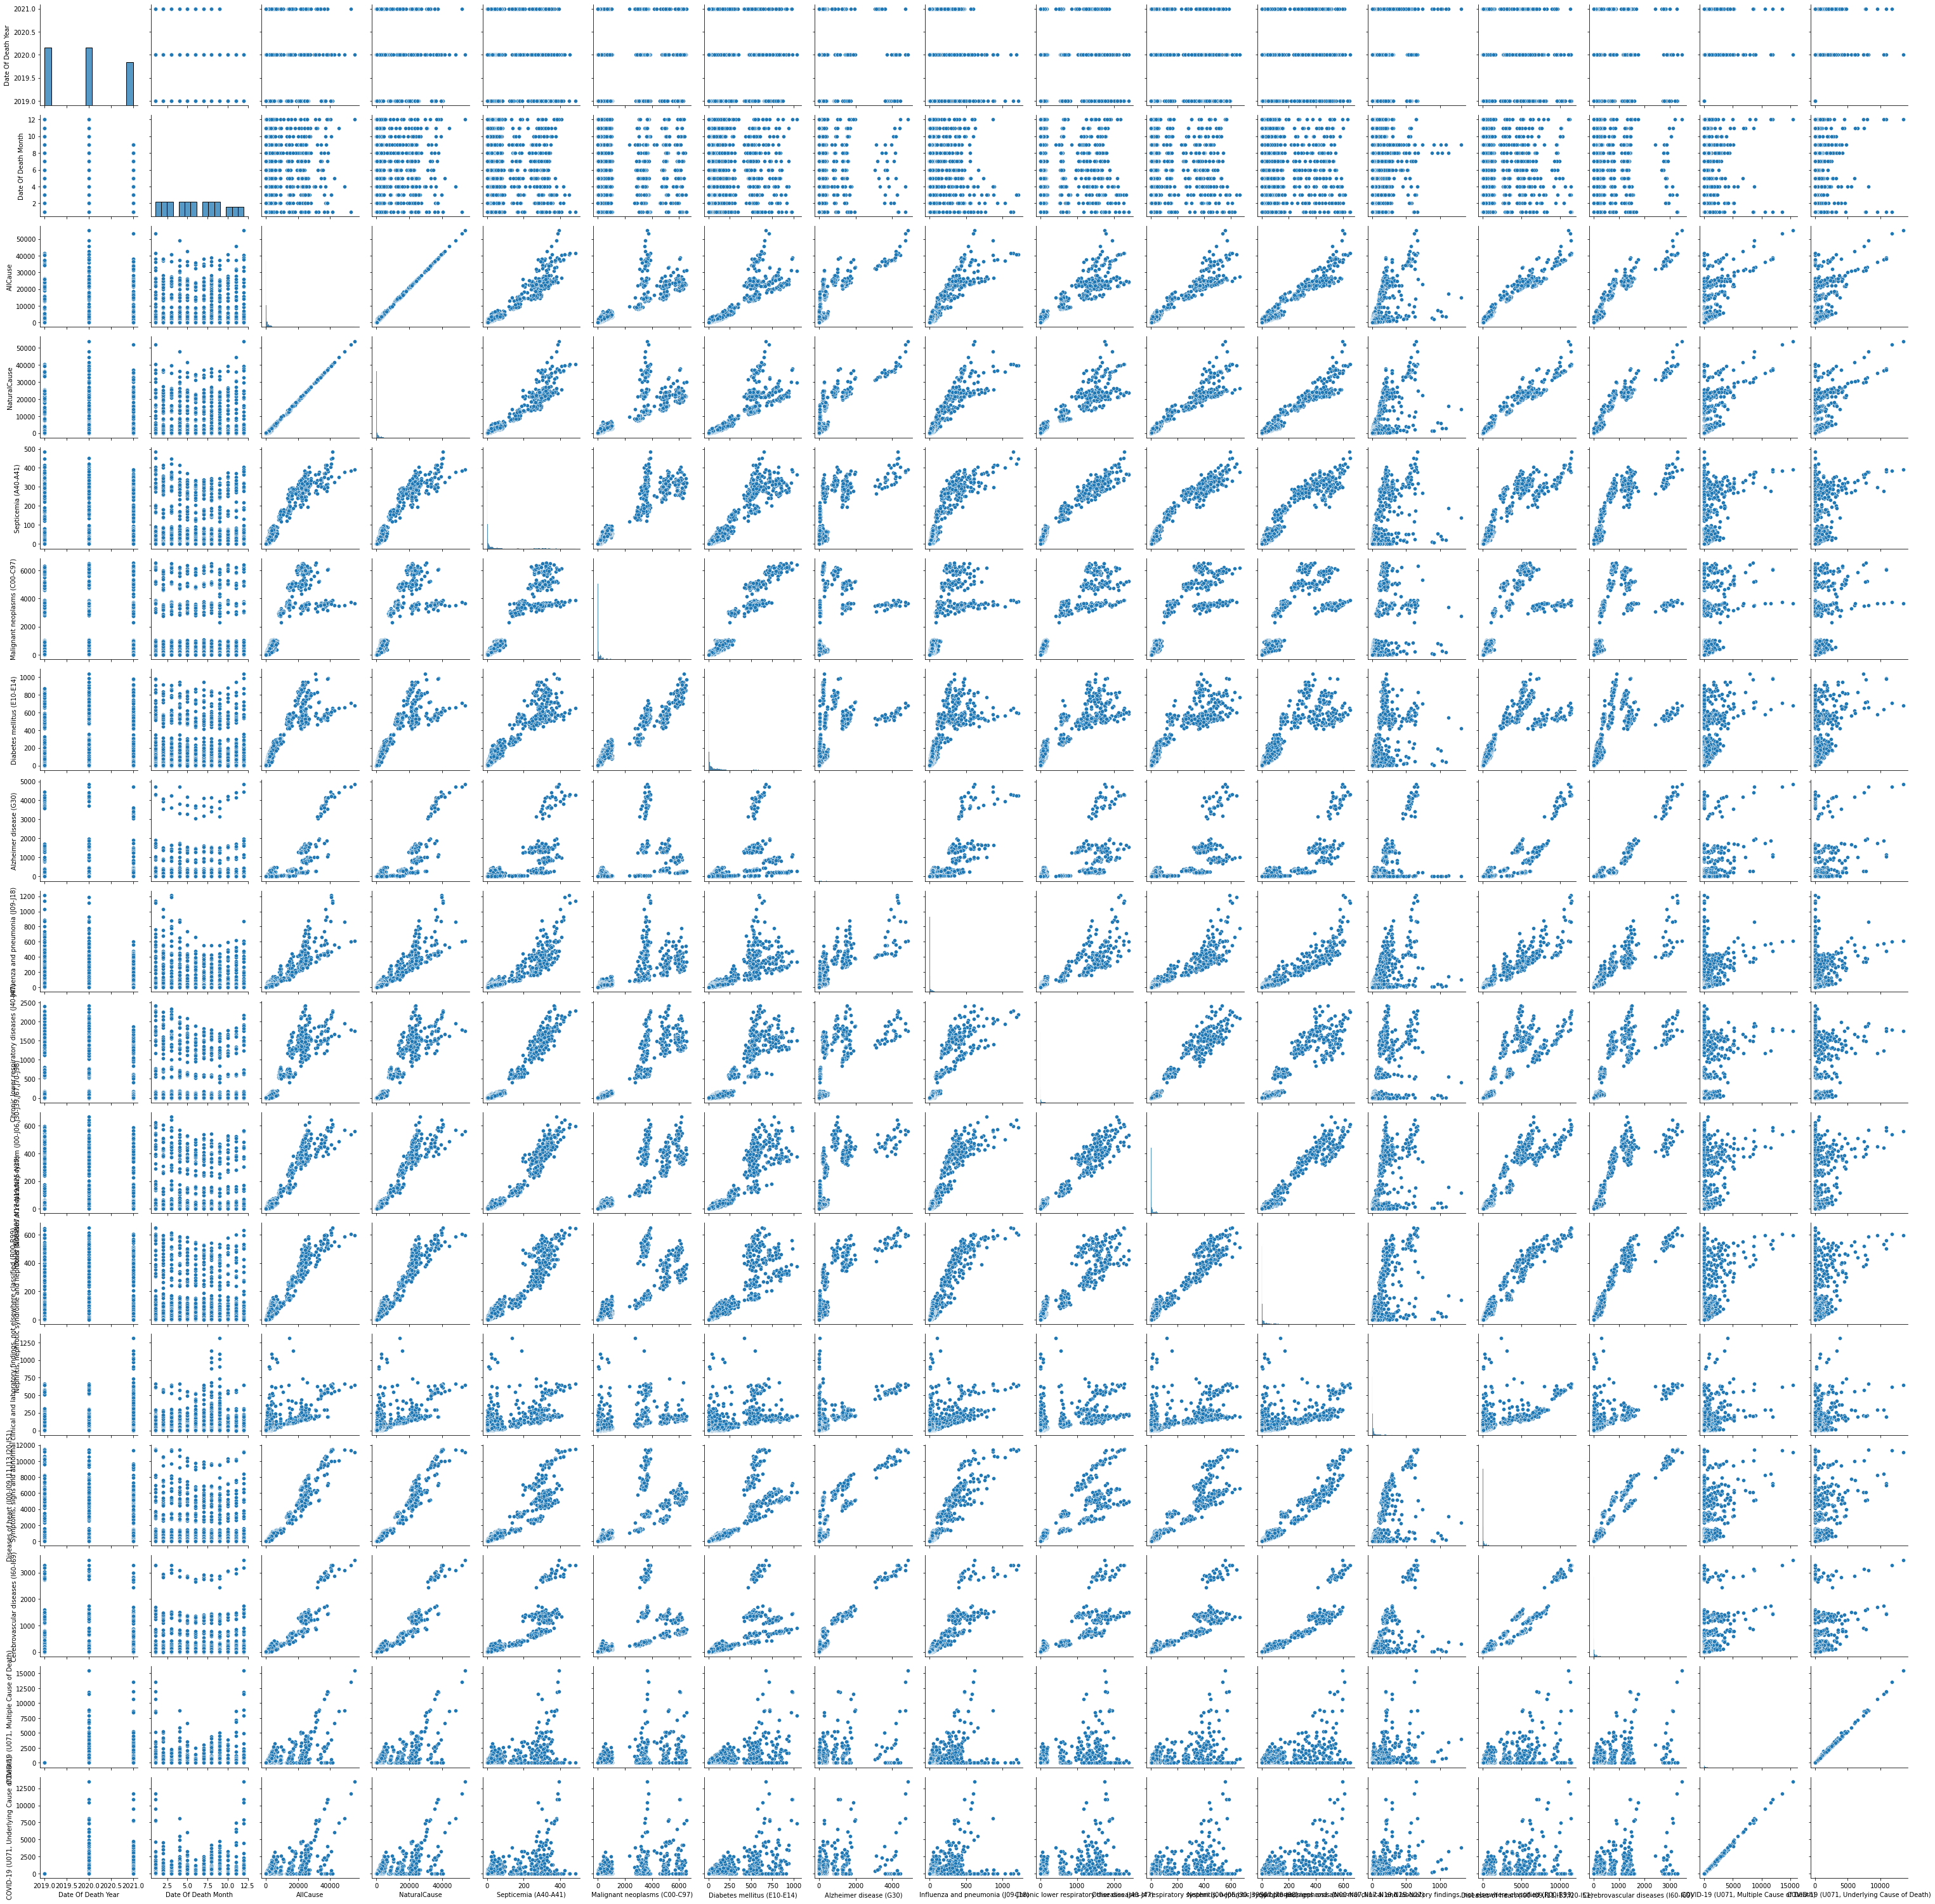

In [50]:
sns.pairplot(df, palette = "YlGnBu")


### 4. Разделить набор данных на обучающую и тестовую выборки

In [35]:
Y = df.pop('Sex')
X = df

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.9, random_state = 50)

### 5. Линейная регрессия
#### 5.1 Обучить модель линейной регрессии (`LinearRegression`)

In [69]:
MLR = LinearRegression()
MLR.fit(X_train, Y_train)

LinearRegression()

In [70]:
pr_MLR = MLR.predict(X_train)
test_MLR = MLR.predict(X_test)

#### 5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [71]:
def print_metrics(predict, Y):
    print(f'MAE:{mean_absolute_error(Y, predict)}')
    print(f'MSE:{mean_squared_error(Y, predict)}')
    print(f'R2:{r2_score(Y, predict)}')

In [72]:
print_metrics(pr_MLR, Y_train)

MAE:0.4402560643367376
MSE:0.20871670812060042
R2:0.16513290461072194


In [73]:
print_metrics(test_MLR, Y_test)

MAE:0.4406848039171078
MSE:0.20952826314477196
R2:0.16186556862202994


#### 5.3 Вывести `model.coef_` и `model.intercept_`

In [74]:
def print_coef_intercept(model):
    print(f'coef: {model.coef_}')
    print(f'intercept: {model.intercept_}')

In [75]:
print_coef_intercept(MLR)

coef: [-6.14943810e-03  1.64086118e-03  4.16115763e-04 -8.22266946e-04
 -5.00442871e-03 -1.80843446e-04  1.98786590e-03 -5.56511881e-04
 -1.20935074e-03  2.34299460e-03  5.05712715e-05  8.85542029e-04
  8.90409116e-04  1.01639638e-03  7.70365348e-04 -4.30770604e-05
  4.87574001e-04]
intercept: 12.8849068015189


#### 5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же, как мы строили графики для feature_importance в теме с деревьями). Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси. 

In [76]:
def make_barh(model, X):
    attribute = X.columns.values
    importance = model.coef_
    list1 = np.vstack([importance, attribute]).T
    list2 = pd.DataFrame(data = {'importance': importance, 'attribute': X.columns, }).sort_values(by = 'importance')
    sns.barplot(data = list2, y = 'attribute', x = 'importance')

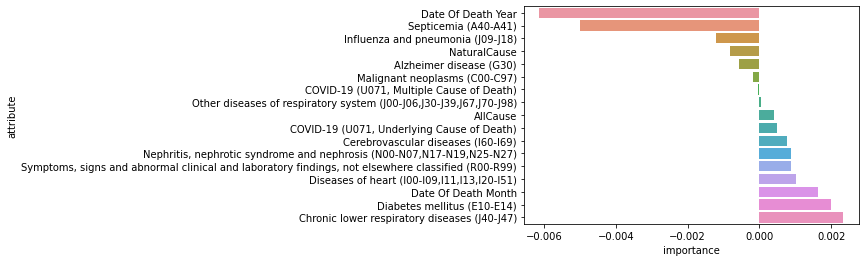

In [77]:
make_barh(MLR, X_train)

### 6. Модель `Lasso`

#### 6.1 Обучить модель регрессии (`Lasso`), с помощью `GridSearchCV` подобрать параметр alpha, дальше работаем с лучшей моделью

In [100]:
LSS = Lasso()
parameters = {"alpha": np.arange(0, 5, 0.1),
    "fit_intercept": [True, False],
    "random_state": [np.arange(0, 10), None],
    "selection": ['cyclic', 'random'],
    "positive": [True, False]
    }

LSS = GridSearchCV(LSS, parameters, refit = True)


In [101]:
LSS.fit(X_train, Y_train)
print(LSS.best_params_)

{'alpha': 0.0, 'fit_intercept': True, 'positive': False, 'random_state': None, 'selection': 'cyclic'}


#### 6.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [103]:
LSS = Lasso(alpha = 0, fit_intercept = True, positive = False)
LSS.fit(X_train, Y_train)
pr_LSS = LSS.predict(X_train)
test_LSS = LSS.predict(X_test)

In [104]:
print_metrics(pr_LSS, Y_train)

MAE:0.44407671385307296
MSE:0.21014445246222024
R2:0.1594219254458059


In [105]:
print_metrics(test_LSS, Y_test)

MAE:0.4457003962616713
MSE:0.2120288087204974
R2:0.1518631311809422


#### 6.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`

In [106]:
print_coef_intercept(LSS)

coef: [-7.81036906e-03  1.82668744e-03  2.38078932e-04 -3.58595052e-04
 -4.86688560e-03 -5.86937423e-04  2.24956349e-03 -8.49316650e-04
 -1.59872200e-03  2.09567523e-03  4.03188674e-05  5.85589111e-04
  6.90429459e-04  6.95141175e-04 -3.54088311e-04  2.56678808e-04
 -1.54637240e-04]
intercept: 16.246851642539685


#### 6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

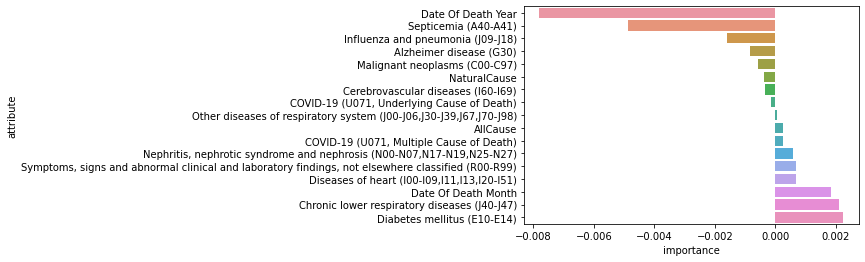

In [108]:
make_barh(LSS, X_train)

### 7. Модель `Ridge`
#### 7.1 Обучить модель регрессии (`Ridge`), с помощью `GridSearchCV`  подобрать параметр alpha, дальше работаем с лучшей моделью

In [111]:
RDG = Ridge()
parameters = {
    'alpha': np.arange(0, 5, 0.1),
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}
RDG = GridSearchCV(RDG, parameters)
RDG.fit(X_train, Y_train)

print(RDG.best_params_)

{'alpha': 1.8, 'fit_intercept': True, 'solver': 'sparse_cg'}


In [112]:
RDG = Ridge(alpha=1.8, fit_intercept=True, solver='sparse_cg')
RDG.fit(X_train, Y_train)

Ridge(alpha=1.8, solver='sparse_cg')

In [113]:
pr_RDG = RDG.predict(X_train)
test_RDG = RDG.predict(X_test)

#### 7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [116]:
print_metrics(pr_RDG, Y_train)

MAE:0.4403343046922643
MSE:0.2087502218259136
R2:0.16499884974725432


#### 7.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`

In [117]:
print_coef_intercept(RDG)

coef: [-1.97668359e-04  7.98015366e-04  4.16142667e-04 -8.21914322e-04
 -5.03711271e-03 -1.77350496e-04  2.00611203e-03 -5.21107740e-04
 -1.21579619e-03  2.33662878e-03  5.32827717e-05  9.39661410e-04
  8.78369821e-04  1.01695835e-03  7.09851036e-04 -2.86452352e-05
  4.69327792e-04]
intercept: 0.8683420860855524


#### 7.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

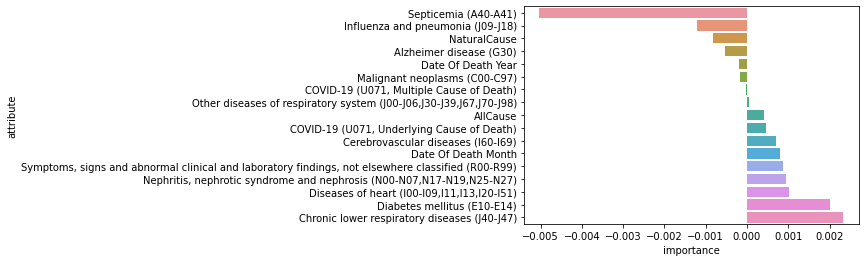

In [118]:
make_barh(RDG, X_train)

### 8. Модель `ElasticNet`
#### 8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

In [119]:
ELN = ElasticNet()
parameters = {
    'alpha': np.arange(0, 5, 0.1),
    'l1_ratio': np.arange(0, 2, 0.1),
}
ELN = GridSearchCV(ELN, parameters)
ELN.fit(X_train, Y_train)
print(ELN.best_params_)

{'alpha': 0.1, 'l1_ratio': 0.2}


#### 8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [120]:
ELN = ElasticNet(alpha=0.1, l1_ratio=0.2)
ELN.fit(X_train, Y_train)
test_ELN = ELN.predict(X_test)
print_metrics(test_ELN, Y_test)

MAE:0.44529011170452765
MSE:0.2117907359642615
R2:0.15281544649716516


#### 8.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`

In [121]:
print_coef_intercept(ELN)

coef: [-0.00000000e+00  3.01162183e-04  2.35634904e-04 -3.58483695e-04
 -4.37250540e-03 -5.78047555e-04  2.12372702e-03 -8.61447332e-04
 -1.60825218e-03  2.05721904e-03  0.00000000e+00  4.09517655e-04
  6.52234211e-04  7.07410339e-04 -3.20500354e-04  1.84073586e-04
 -7.18228496e-05]
intercept: 0.4808310674082346


#### 8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

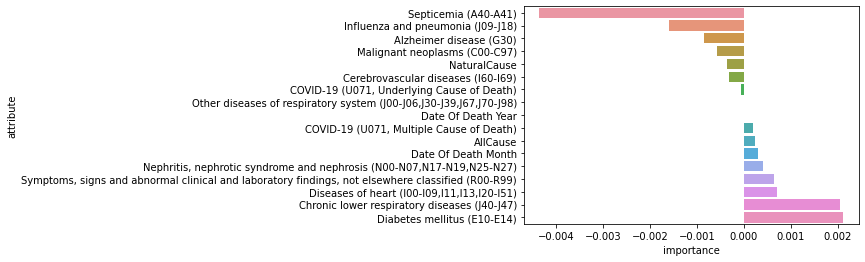

In [122]:
make_barh(ELN, X_train)

### 9. Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

Лучшая модель `ElasicNet(alpha = 0.1, l1_ratio = 0.2)`

In [137]:
print_metrics(test_ELN, Y_test)

MAE:0.44529011170452765
MSE:0.2117907359642615
R2:0.15281544649716516


### 10. Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через `pd.get_dummies( ..., drop_first = True )`. Обучаем лучшую модель.

In [201]:
df = get_dummies(full_copy, drop_first = True)
Y = df.pop("Sex_M")
X = df
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.9, random_state = 50)

In [202]:
Best_Model = ElasticNet(alpha = 0.1, l1_ratio = 0.2)
Best_Model.fit(X_train, Y_train)

ElasticNet(alpha=0.1, l1_ratio=0.2)

### 11. Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

In [203]:
predict = Best_Model.predict(X_test)
print_metrics(predict, Y_test)

MAE:0.44529011170452765
MSE:0.2117907359642615
R2:0.15281544649716516


### 12. Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. 
Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы. 

In [204]:
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.fit_transform(X_test)

In [205]:
Best_Model_Scaler = ElasticNet(alpha = 0.1, l1_ratio = 0.2)
Best_Model_Scaler.fit(X_trains, Y_train)

ElasticNet(alpha=0.1, l1_ratio=0.2)

In [206]:
predict = Best_Model_Scaler.predict(X_tests)
print_metrics(predict, Y_test)

MAE:0.49526790458834125
MSE:0.24615466920016138
R2:0.015356207298101943


### 13. Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

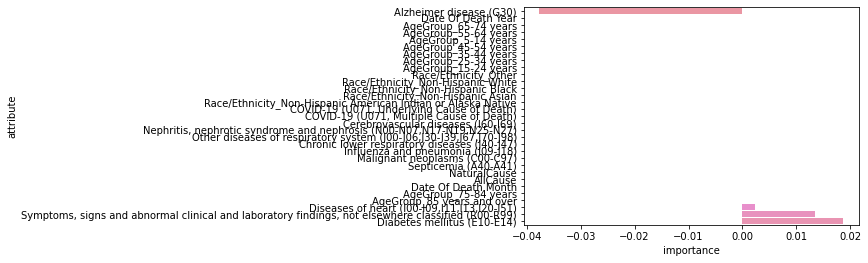

In [207]:
make_barh(Best_Model_Scaler, pd.DataFrame(X_trains, columns = X_train.columns))